In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [4]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [44]:
train[(train['uniqueid'] == 'uniqueid_7867')& (train['country'] == 'Kenya')]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type


In [35]:
train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [36]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [5]:
def func(x):
    if x == 'Yes':
        x = 1
    else:
        x = 0
    return x
    

In [6]:
train['bank_account'] = train['bank_account'].apply(func)

In [7]:
train['bank_account'].unique()

array([1, 0], dtype=int64)

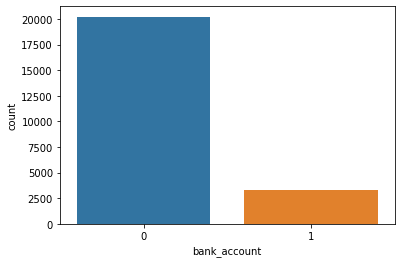

In [40]:
sns.countplot(data=train,x='bank_account')

In [8]:
X = train.drop('bank_account',axis=1)
y= train['bank_account']

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [10]:
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    le = LabelEncoder()
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data            

In [11]:
processed_train = preprocessing_data(X)
processed_test = preprocessing_data(test)

In [45]:
print(processed_train.shape)

(23524, 37)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(processed_train, y, test_size=0.1, random_state=101)

In [15]:
from sklearn.linear_model import LogisticRegressionCV

In [26]:
log_model = LogisticRegressionCV(class_weight='balanced')

In [27]:
log_model.fit(X_train,y_train)

C:\Users\Lastknight\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV(Cs=10, class_weight='balanced', cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [28]:
log_model.get_params

<bound method BaseEstimator.get_params of LogisticRegressionCV(Cs=10, class_weight='balanced', cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)>

In [29]:
log_model.coef_

array([[-0.05501594,  0.21761254,  1.67410426,  0.04517127,  1.09993784,
         0.38978419, -0.34190343,  0.4776427 ,  0.04816596, -0.18988064,
        -0.29015095,  0.29540882, -0.07155188, -0.01447297,  0.12570589,
        -0.04335364,  0.00295505, -1.58123595,  0.05321022, -0.85322214,
         0.08620078,  1.29177888,  1.00255067, -0.13917057, -0.59217056,
         0.913177  ,  1.05859368,  0.63218729, -0.81038788, -0.61255539,
         0.18340996, -0.60405894, -0.02974215,  0.81932021,  0.29594154,
        -0.48328628, -0.632693  ]])

In [30]:
y_pred = log_model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
1 - accuracy_score(y_pred,y_test)

0.2095197620059499

In [33]:
confusion_matrix(y_pred,y_test)

array([[1595,   85],
       [ 408,  265]], dtype=int64)

In [34]:
from sklearn.metrics import plot_confusion_matrix


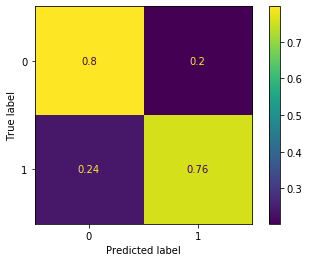

In [35]:
plot_confusion_matrix(log_model,X_test,y_test,normalize='true')

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

In [ ]:
# logistic = LogisticRegression(solver='saga',max_iter=100)
# penalty = ['l1','l2']
# C = np.logspace(0,5,6)
# param_grid = {'penalty':penalty,'C':C}

In [ ]:
# grid = GridSearchCV(logistic,param_grid)

In [ ]:
# grid_model = grid.fit(X_train,y_train)

In [59]:
ss

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0
...,...,...
33605,uniqueid_2998 x Uganda,0
33606,uniqueid_2999 x Uganda,0
33607,uniqueid_3000 x Uganda,0
33608,uniqueid_3001 x Uganda,0


In [37]:
Y_pred = log_model.predict(processed_test)

In [38]:
dict_ = {'uniqueid':test['uniqueid'] + 'x'+ test['country'], 'bank_account':Y_pred}

In [39]:
df_submission = pd.DataFrame(dict_)

In [40]:
df_submission.sample(5)

,uniqueid,bank_account
4983,uniqueid_11118xRwanda,0
420,uniqueid_6489xKenya,1
6493,uniqueid_6768xTanzania,0
6299,uniqueid_12434xRwanda,1
6350,uniqueid_6524xTanzania,1


In [41]:
df_submission.to_csv('second_submission.csv', index = False)